In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  HistGradientBoostingRegressor


In [2]:
df = pd.read_csv('data_clean2023.csv')
df

,Flight_ID,Aeronave,STD,STA,Capacity,Passengers,Bookings,Agua Natural 600 Ml,Amstel Ultra,Arandano,...,ArrivalStation_encoded,is_holiday,hour_STD,minutes_STD,hour_STA,minutes_STA,day_of_week,week_of_year,month,time_of_fligth
0,ab954014077430bd842cfa305a55c0f8,XA-VBY,2023-10-19 11:40:00,2023-10-19 14:25:00,240,229.0,157.0,5.0,2.0,0.0,...,21,0,11,40,14,25,3,42,10,165.0
1,efd86c996035dacdca7a0ccb2560dda1,XA-VIX,2023-07-03 00:55:00,2023-07-03 04:55:00,186,197.0,109.0,3.0,0.0,1.0,...,17,0,0,55,4,55,0,27,7,240.0
2,dd0fad3248951d2f71d63e6279aeaa4b,XA-VBW,2023-06-26 15:15:00,2023-06-26 15:55:00,220,200.0,142.0,0.0,0.0,0.0,...,14,0,15,15,15,55,0,26,6,40.0
3,d0987ee648eea254063bfe2b39571b67,XA-VAP,2023-02-10 08:40:00,2023-02-10 09:50:00,186,162.0,90.0,2.0,0.0,0.0,...,0,0,8,40,9,50,4,6,2,70.0
4,3b5df8805161ea827d2f2e4298c38e06,XA-VBY,2023-09-07 17:10:00,2023-09-07 18:05:00,240,183.0,125.0,0.0,0.0,0.0,...,13,0,17,10,18,5,3,36,9,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122212,d9ef769565064b1ff1ad90d6d18f69cb,XA-VYF,2023-12-26 06:20:00,2023-12-26 10:10:00,180,166.0,89.0,7.0,0.0,0.0,...,40,0,6,20,10,10,1,52,12,230.0
122213,598035669a4f0fa2ce1207977932df9e,XA-VAI,2023-12-28 10:25:00,2023-12-28 13:50:00,180,142.0,54.0,12.0,0.0,0.0,...,40,0,10,25,13,50,3,52,12,205.0
122214,90d2cab80b7700b5d854ae393678144b,XA-VYA,2023-12-23 11:45:00,2023-12-23 15:00:00,180,156.0,61.0,0.0,0.0,0.0,...,40,0,11,45,15,0,5,51,12,195.0
122215,cc7c1c5e6fd132fd0bdab3a35aac33c0,XA-VBK,2023-12-29 07:30:00,2023-12-29 14:50:00,240,189.0,86.0,10.0,5.0,0.0,...,40,0,7,30,14,50,4,52,12,440.0


In [3]:
df.set_index('Flight_ID', inplace=True)

In [4]:
X = df.drop(columns=['Aeronave', 'STD', 'STA', 'Passengers', 'Bookings'])

In [5]:
X = X.iloc[:, -14:]

In [6]:
X["Capacity"] = df["Capacity"]

In [7]:
y = df["Passengers"]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, shuffle=True)

In [9]:
#from sklearn.model_selection import train_test_split, GridSearchCV
#from sklearn.experimental import enable_hist_gradient_boosting  # Habilitar HistGradientBoostingRegressor
#from sklearn.ensemble import HistGradientBoostingRegressor
#from sklearn.metrics import mean_squared_error
# Definir los parámetros que deseas explorar
#param_grid = {
#    'max_depth': [3, 5, 7, 8, 9, 10],
#    'learning_rate': [0.1, 0.01],
#    'max_iter': [50, 100, 200, 250, 300]
#}

# Inicializar el regresor HistGradientBoosting
#hgb_model = HistGradientBoostingRegressor()

# Realizar la búsqueda de hiperparámetros con GridSearchCV
#grid_search = GridSearchCV(estimator=hgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
#grid_search.fit(X_train, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
#best_params = grid_search.best_params_
#best_model = grid_search.best_estimator_

# Evaluar el mejor modelo en el conjunto de prueba
#y_pred = best_model.predict(X_test)
#mse = mean_squared_error(y_test, y_pred)

#print("Mejores hiperparámetros:", best_params)
#print("Error cuadrático medio en el conjunto de prueba:", mse)

In [10]:
model = HistGradientBoostingRegressor(random_state=123, max_depth=7, max_iter=200, learning_rate=0.1)

In [11]:
model.fit(X_train, y_train)

c:\Users\jesus\anaconda3\envs\datathon2024\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jesus\anaconda3\envs\datathon2024\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


HistGradientBoostingRegressor(max_depth=7, max_iter=200, random_state=123)

In [12]:
model.score(X_test, y_test)

0.6315828296856529

In [13]:
y_pred = model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

In [15]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
mape = mean_absolute_percentage_error(y_true=y_test, y_pred=y_pred)
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

print(f'MAE: {mae:.2f}')
print(f'MAPE: {mape:.2f}')
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

MAE: 16.99
MAPE: 0.13
MSE: 518.40
R2: 0.63


In [16]:
results = pd.DataFrame({"Real": y_test, "Predicted values": y_pred})
results = results.sample(n = 200)
results

,Real,Predicted values
Flight_ID,,
c710ccf5e84ace87f083641f2835fbec,186.0,183.499809
26e69fc98c25c26a6e6cca9c535ac523,131.0,168.058908
98daedc1c297021d42dda3e22f745667,225.0,211.569806
3bb924c91bcf3fe8cb4f990c9d16a288,130.0,139.965227
7b80a70b9a2bf87d18a7954e391a227d,215.0,218.738219
...,...,...
a0925c15ba406891abe0325f3bf98eba,184.0,177.290741
cc619e3a404a0eff8c0f7e6b6a703652,206.0,214.134154
cd7892cd88cb52de808f4eb1bedf96c5,146.0,169.316393


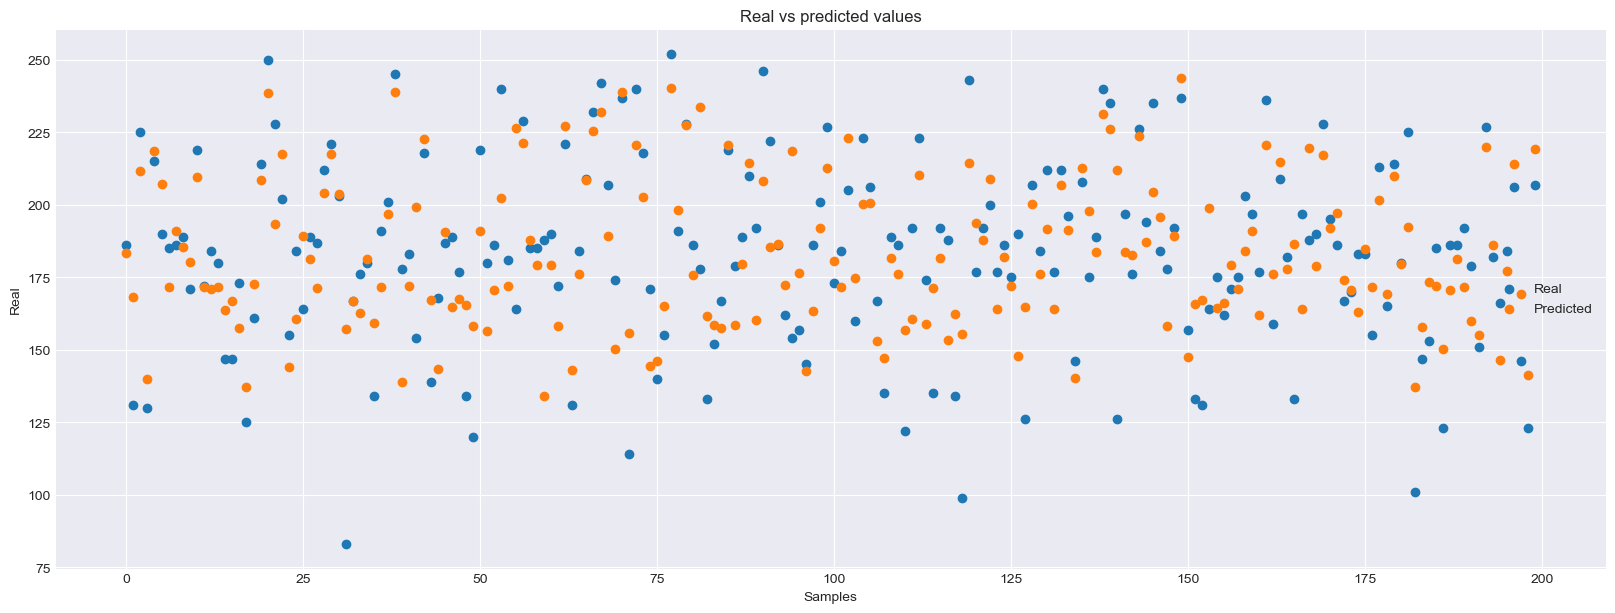

In [17]:
plt.figure(figsize=(20, 7))

plt.scatter(np.arange(200), results["Real"], label="Real")
plt.scatter(np.arange(200), results["Predicted values"], label="Predicted")
plt.title("Real vs predicted values")
plt.legend(loc="center right")
plt.xlabel("Samples")
plt.ylabel("Real")
plt.show()

# Prediction 2024

In [18]:
df = pd.read_csv('data_clean2024.csv')
df

,Flight_ID,Aeronave,STD,STA,Capacity,Passengers,Bookings,Agua Natural 600 Ml,Amstel Ultra,Arandano,...,ArrivalStation_encoded,is_holiday,hour_STD,minutes_STD,hour_STA,minutes_STA,day_of_week,week_of_year,month,time_of_fligth
0,bb319ee8f62b5ae38e6f6da4dbff03cb,XA-VAV,2024-01-12 08:20:00,2024-01-12 09:20:00,186,NaN,0.0,0.0,0.0,0.0,...,0,0,8,20,9,20,4,2,1,60.0
1,31659639d39b84bc59149bcc3f6d4e7a,XA-VAI,2024-01-11 06:50:00,2024-01-11 07:55:00,180,NaN,0.0,0.0,0.0,0.0,...,39,0,6,50,7,55,3,2,1,65.0
2,17718d43f541b4e944c5d8bd5b44e6a6,XA-VXO,2024-01-25 11:05:00,2024-01-25 11:55:00,240,NaN,0.0,0.0,0.0,0.0,...,19,0,11,5,11,55,3,4,1,50.0
3,43cfcc874d1f88dd5562d8b4657d1559,XA-VIT,2024-01-12 12:10:00,2024-01-12 12:50:00,186,NaN,0.0,0.0,0.0,0.0,...,13,0,12,10,12,50,4,2,1,40.0
4,10099a86c19b730babcfcc371c6bd98c,XA-VYD,2024-01-06 14:55:00,2024-01-06 16:00:00,180,NaN,0.0,0.0,0.0,0.0,...,39,0,14,55,16,0,5,1,1,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10600,512e4e3a66e19dd86394c0feff3b8821,XA-VYD,2024-01-30 10:00:00,2024-01-30 13:15:00,180,NaN,0.0,0.0,0.0,0.0,...,40,0,10,0,13,15,1,5,1,195.0
10601,117cfb4ea348312b8dc48a751fa9c37b,XA-VBI,2024-01-06 12:50:00,2024-01-06 16:10:00,220,NaN,0.0,0.0,0.0,0.0,...,40,0,12,50,16,10,5,1,1,200.0
10602,2d560165088399e3638a31479412c69b,XA-VIS,2024-01-02 06:20:00,2024-01-02 10:10:00,186,NaN,0.0,0.0,0.0,0.0,...,40,0,6,20,10,10,1,1,1,230.0
10603,1d178f4a133f821d3371d21870a1b138,XA-VIS,2024-01-13 06:20:00,2024-01-13 10:10:00,186,NaN,0.0,0.0,0.0,0.0,...,40,0,6,20,10,10,5,2,1,230.0


In [19]:
df.set_index('Flight_ID', inplace=True)

In [20]:
X = df.drop(columns=['Aeronave', 'STD', 'STA', 'Passengers', 'Bookings'])
X = X.iloc[:, -14:]
X["Capacity"] = df["Capacity"]
y = df["Passengers"]

In [21]:
y_pred = model.predict(X)


In [22]:
prediction_pass = pd.DataFrame({"Flight_ID": df.index, "Predicted Passengers": y_pred})
round(prediction_pass)
prediction_pass.to_csv("prediction_pass.csv", index=False)